In [49]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [101]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [12]:
print(train_data.columns.values)
train_data.describe()
train_data.describe(include=['O'])

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


Text(0.5, 1.0, 'combine')

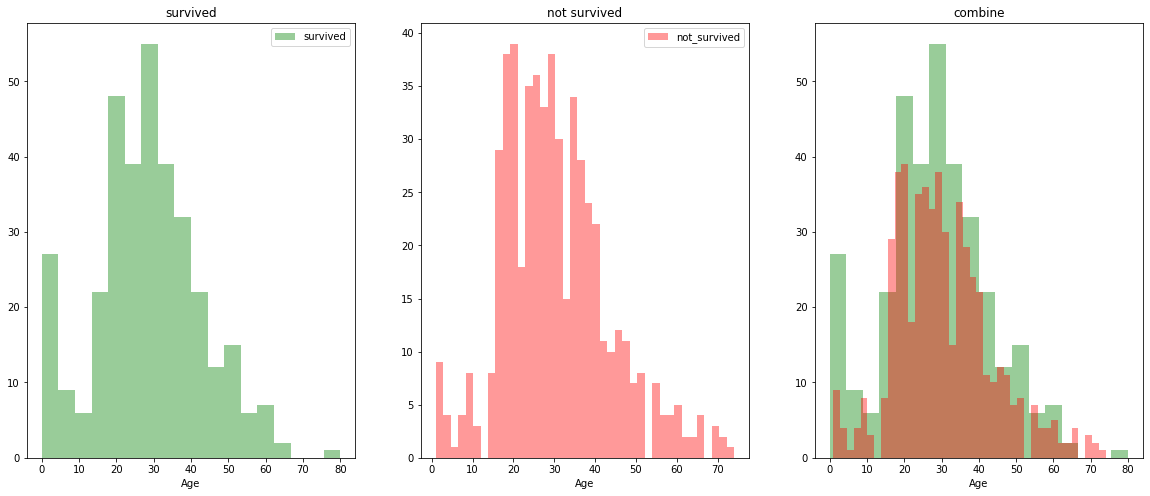

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 8))
ax = sns.distplot(train_data[train_data['Survived']==1].Age.dropna(), bins=18, label = 'survived', ax = axes[0], kde =False, color="green")
ax.legend()
ax.set_title('survived')
ax = sns.distplot(train_data[train_data['Survived']==0].Age.dropna(), bins=40, label = 'not_survived', ax = axes[1], kde = False, color="red")
ax.legend()
ax.set_title('not survived')
ax = sns.distplot(train_data[train_data['Survived']==1].Age.dropna(), bins=18, label = 'survived', ax = axes[2], kde =False, color="green")
ax = sns.distplot(train_data[train_data['Survived']==0].Age.dropna(), bins=40, label = 'not_survived', ax = axes[2], kde = False, color="red")
ax.set_title('combine')

1. Young passengers had high survival rate, and old passengers had low survival rate.
2. Most passengers are in 15-35 age range, and many passengers in this range did not survive.

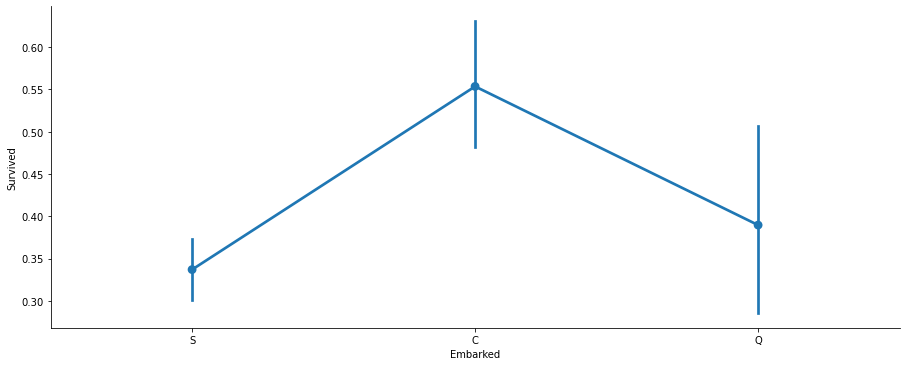

In [67]:
sns.factorplot('Embarked','Survived', data=train_data, aspect = 2.5)

Passengers from port ‘Southampton’ have a low survival rate of 34%, from the port ‘Cherbourg’ have a survival rate of 55%, from the port ‘Queenstown’ have a survival rate of 39%

In [102]:

train_data = train_data.drop('Ticket', axis=1)
test_data = test_data.drop('Ticket', axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


ticket number is random, so we drop this column

In [103]:
combine = [train_data, test_data]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir','Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Certain titles mostly survived or did not

In [104]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_data = train_data.drop(['Name', 'PassengerId'], axis=1)
test_data = test_data.drop(['Name'], axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,NaN,S,1
1,1,1,female,38.0,1,0,71.2833,C85,C,3
2,1,3,female,26.0,0,0,7.9250,NaN,S,2
3,1,1,female,35.0,1,0,53.1000,C123,S,3
4,0,3,male,35.0,0,0,8.0500,NaN,S,1


We can drop name and passengerID

In [ ]:
#print(train_data.info)
#print(train_data.isnull().sum())
#print(test_data.isnull().sum())
#train_data.describe(include='all')

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
#from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
#from pandas.tools.plotting import scatter_matrix

data_raw = pd.read_csv('./data/train.csv')
data_val  = pd.read_csv('./data/test.csv')

data1 = data_raw.copy(deep = True)
data_cleaner = [data1, data_val]

Target = ['Survived']
#pclass, sibsp, fare
data1_x = ['Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch', 'Age', 'Fare']
for x in data1_x:
    if data1[x].dtype != 'float64':
        print('Survival Correlation by:', x)
        print(data1[[x, 'Survived']].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        
        
data1['Fare'] = pd.qcut(data1['Fare'], 13)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=data1)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()


#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)

In [ ]:
#print(train_data.info)
#print(train_data.isnull().sum())
#print(test_data.isnull().sum())
#train_data.describe(include='all')

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
#from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
#from pandas.tools.plotting import scatter_matrix

data_raw = pd.read_csv('./data/train.csv')
data_val  = pd.read_csv('./data/test.csv')

data1 = data_raw.copy(deep = True)
data_cleaner = [data1, data_val]

Target = ['Survived']
#pclass, sibsp, fare
data1_x = ['Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch', 'Age', 'Fare']
for x in data1_x:
    if data1[x].dtype != 'float64':
        print('Survival Correlation by:', x)
        print(data1[[x, 'Survived']].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        
        
data1['Fare'] = pd.qcut(data1['Fare'], 13)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=data1)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()


#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)